In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
import np
import matplotlib as plt

In [2]:
# Load training data with training texts and training labels
# This is an sklearn type "bunch"
reviews_train = load_files("data/aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target
print("type of text_train: {}".format(type(text_train)))
print("length of text_train: {}".format(len(text_train)))
print("text_train[6]: \n{}".format(text_train[6]))

type of text_train: <class 'list'>
length of text_train: 25000
text_train[6]: 
b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [3]:
# We have lots of html specific line breaks in the documents
# They need to be removed
text_train = [doc.replace(b"<br />", b" ") for doc in text_train] 

In [4]:
# How many positive/ negative tagged documents are there
print("Samples per class (training): {}".format(np.bincount(y_train))) 

Samples per class (training): [12500 12500]


In [5]:
reviews_test = load_files("data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

# TODO: Assign label negative or positive based on the text content

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [6]:
#-----------------------------------------------------------------------------------------------------------------------
# A simple test for vectorization process
bards_words = ["The fool doth think he is wise,",
               "but the wise man knows himself to be a fool"]
# Create vocabulary
vect = CountVectorizer()
vect.fit(bards_words)
print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))
# Transform it
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))
#-----------------------------------------------------------------------------------------------------------------------

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}
bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>
Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [7]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))
# The vocabulary contains 74849 elements, thus the number of rows = 74849
# Columns represent the documents

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [8]:
# Another way to access vocabulary
feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 74849
First 20 features:
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']
Every 2000th feature:
['00', 'aesir', 'aquarian', 'barking', 'blustering', 'bête', 'chicanery', 'condensing', 'cunning', 'detox', 'draper', 'enshrined', 'favorit', 'freezer', 'goldman', 'hasan', 'huitieme', 'intelligible', 'kantrowitz', 'lawful', 'maars', 'megalunged', 'mostey', 'norrland', 'padilla', 'pincher', 'promisingly', 'receptionist', 'rivals', 'schnaas', 'shunning', 'sparse', 'subset', 'temptations', 'treatises', 'unproven', 'walkman', 'xylophonist']


In [9]:
# TODO: test logistic regression further
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Mean cross-validation accuracy: 0.88


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
X_test = vect.transform(text_test)
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.88


In [11]:
# We only want to return the words that appear at least in 5 different documents
# which is to define with min_df argument
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df=5: {}".format(repr(X_train)))
# Now we have 27271 elements in vocabulary

X_train with min_df=5: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [12]:
feature_names = vect.get_feature_names()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Features 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciati

In [13]:
# Logistic regression with the new matrix?
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))



/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best cross-validation score: 0.89


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2.) Stopwords

In [14]:
# Sklearn stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stop word:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stop word:
['for', 'since', 'further', 'hasnt', 'us', 'mine', 'on', 'next', 'while', 'side', 'whereafter', 'somehow', 'give', 'serious', 'against', 'always', 'eg', 'seem', 'each', 'me', 'whither', 'thru', 'nowhere', 'full', 'being', 'still', 'other', 'whoever', 'this', 'whenever', 'somewhere', 'five']


In [15]:
# My own stop words
import pickle
extra_stopwords = pickle.load(open("extra_stopwords.p", "rb"))

In [16]:
# any differences?
# add them to the extra stopwords
extra_stopwords.extend([list(ENGLISH_STOP_WORDS)[i] for i in  [i for i,x in enumerate([i not in extra_stopwords for i in ENGLISH_STOP_WORDS]) if x]])
pickle.dump(extra_stopwords, open("extra_stopwords.p", "wb"))
print("Our stop words: {}".format((len(extra_stopwords))))
# More stopwords

Our stop words: 2326


In [17]:
# This one will be tested with extra stop words
X_train_extra = X_train
vect = CountVectorizer(min_df=5, stop_words="english" ).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [18]:
# Now with out stop words
vect_extra = CountVectorizer(min_df=5, stop_words=frozenset(extra_stopwords) ).fit(text_train)
X_train_extra = vect_extra.transform(text_train)
print("X_train_extra with extra stop words:\n{}".format(repr(X_train_extra)))
# Much fewer elements in the vocabulary

/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['articl', 'mon'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


X_train_extra with extra stop words:
<25000x26476 sparse matrix of type '<class 'numpy.int64'>'
	with 1802772 stored elements in Compressed Sparse Row format>


In [19]:
# Grid search performance for the def X_train
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best cross-validation score: 0.88


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# Grid search performance for the def X_train_extra
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_extra, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
# no difference


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best cross-validation score: 0.88


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 3.) Rescaling the Data with tf-idf

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross validation score: {:.2f}".format(grid.best_score_))
# No effect!

/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best cross validation score: 0.89


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# Transform the training set
X_train = vectorizer.transform(text_train)
# Find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# Get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'songwriting' 'galadriel'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
Features with highest tfidf:
['gadget' 'sucks' 'zatoichi' 'demons' 'lennon' 'bye' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


In [23]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
    feature_names[sorted_by_idf[:100]]
))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


# 4.) Model Coefficients

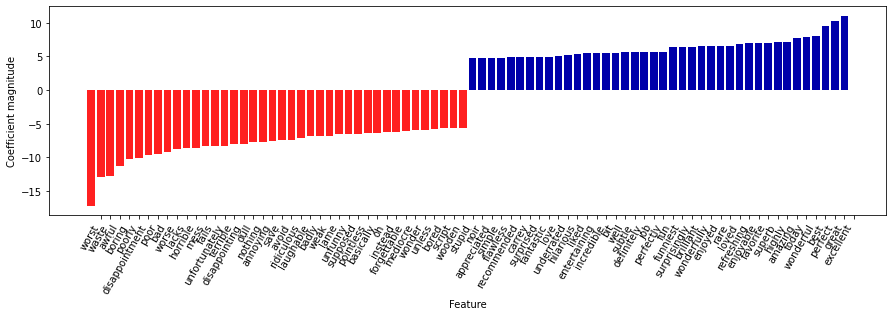

In [24]:
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names,
    n_top_features=40
)

# 5.) n-Grams

In [25]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# running the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
"tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


/home/ubd/anaconda/envs/topic_modelling/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TypeError: 'module' object is not callable

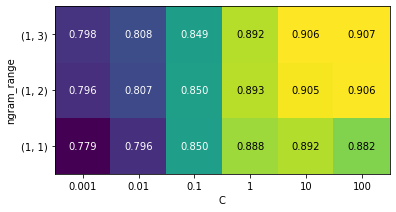

In [26]:
# extract scores from grid_search
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
xticklabels=param_grid['logisticregression__C'],
yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)


In [ ]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

In [ ]:
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
feature_names[mask], n_top_features=40)


# 6.) Tokenization, Stemming, Lemmatization

## 6.1.) Porter stemmer by spacy library

Widely applied collection of heuristics

In [ ]:
import nltk
import spacy
print('Spacy version: {}'.format(spacy.__version__))
import sklearn
print('nltk version: {}'.format(nltk.__version__))

In [ ]:
# Spacy english lang.
en_nlp = spacy.load('en')
# instantiate nltk's Porter stemmer
stemmer = nltk.stem.PorterStemmer()

### 6.1.2.) Compare Spacy's lemmatization and nltk's stemming

In [ ]:
def compare_normalization(doc):
    # tokenize deoc in spacy
    doc_spacy = en_nlp(doc)
    # print lemmas found by spacy
    print("lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter stemmer
    print("stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])
    

In [ ]:
compare_normalization(u"Our Meeting today was worse than yesterday,"
                      "I'm scared of meeting the clients tomorrow.")

Stemming is always restricted to trimming the word to a stem, so "was" becomes
"wa", while lemmatization can retrieve the correct base verb form, "be". Similarly,
lemmatization can normalize "worse" to "bad", while stemming produces "wors".
Another major difference is that stemming reduces both occurrences of "meeting" to
"meet". Using lemmatization, the first occurrence of "meeting" is recognized as a
noun and left as is, while the second occurrence is recognized as a verb and reduced
to "meet". In general, lemmatization is a much more involved process than stem‐
ming, but it usually produces better results than stemming when used for normaliz‐
ing tokens for machine learning.


In [ ]:
# Technicality: we want to use the regexp-based tokenizer
# that is used by CountVectorizer and only use the lemmatization
# from spacy. To this end, we replace en_nlp.tokenizer (the spacy tokenizer)
# with the regexp-based tokenization.
import re
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# load spacy language model
en_nlp = spacy.load("en", disable=['parser', 'ner'])
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

# create custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]
# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer = custom_tokenizer, min_df=5)

In [ ]:
# transform text_train using CountVectorizer with lemmatization
#X_train_lemma = lemma_vect.fit_transform(text_train)
#print("X_train_lemma.shape: {}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect = CountVectorizer(min_df=5).fit(text_train)
print("X_train.shape: {}".format(X_train.shape))

# 7.) Topic Modelling

One particular technique that is often applied to text data is topic modeling, which is
an umbrella term describing the task of assigning each document to one or multiple
topics, usually without supervision. 

A good example for this is news data, which
might be categorized into topics like “politics,” “sports,” “finance,” and so on. 

Each of the components we
learn then corresponds to one topic, and the coefficients of the components in the
representation of a document tell us how strongly related that document is to a par‐
ticular topic. Often, when people talk about topic modeling, they refer to one particu‐
lar decomposition method called Latent Dirichlet Allocation (often LDA for short).

Intuitively, the LDA model tries to find groups of words (the topics) that appear
together frequently. LDA also requires that each document can be understood as a
“mixture” of a subset of the topics. It is important to understand that for the machine
learning model a “topic” might not be what we would normally call a topic in every‐
day speech,

 Even if there is a semantic meaning for an LDA “topic”, it might not be some‐
thing we’d usually call a topic. Going back to the example of news articles, we might
have a collection of articles about sports, politics, and finance, written by two specific
authors. In a politics article, we might expect to see words like “governor,” “vote,”
“party,” etc., while in a sports article we might expect words like “team,” “score,” and
“season.” Words in each of these groups will likely appear together, while it’s less likely
that, for example, “team” and “governor” will appear together. However, these are not
the only groups of words we might expect to appear together. The two reporters
might prefer different phrases or different choices of words. Maybe one of them likes
to use the word “demarcate” and one likes the word “polarize.” Other “topics” would
then be “words often used by reporter A” and “words often used by reporter B,”
though these are not topics in the usual sense of the word.


**Let’s apply LDA to our movie review dataset to see how it works in practice. For
unsupervised text document models, it is often good to remove very common words,
as they might otherwise dominate the analysis. We’ll remove words that appear in at
least 20 percent of the documents, and we’ll limit the bag-of-words model to the
10,000 words that are most common after removing the top 20 percent:**


In [ ]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

We will learn a topic model with 10 topics, which is few enough that we can look at all
of them. Similarly to the components in NMF, topics don’t have an inherent ordering,
and changing the number of topics will change all of the topics.10 We’ll use the
"batch" learning method, which is somewhat slower than the default ("online") but
usually provides better results, and increase "max_iter", which can also lead to better
models:


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10,    # Changed in version 0.19: n_topics was renamed to n_components
                               learning_method="batch",
                               max_iter=25,
                               random_state=0)
# We build the model and transform the data in one step
# Computing transform takes some time,
# and we can save time by doing both at once
document_topics = lda.fit_transform(X)

In [ ]:
# how long goes it take?
import timeit
start = timeit.default_timer()
document_topics = lda.fit_transform(X)
stop = timeit.default_timer()

print('Time: ', stop - start)  

In [ ]:
print("lda.components_.shape: {}".format(lda.components_.shape))

In [ ]:
# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:, ::-1] to make sorting descending
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Get the feature names from the vectorizer
feature_names = np.array(vect.get_feature_names())


In [ ]:
# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
sorting=sorting, topics_per_chunk=5, n_words=10)


What we are seeing above is after excluding the 20% of the commonly appearing words the most frequent appearing words in each topic group (the doc. LDA decided them to have the same topic). There is btw. not a single topic in a doc. but a collection of topics.

In [ ]:
lda100 = LatentDirichletAllocation(n_components=100, learning_method="batch",
max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)
topics = np.array([7, 16, 24, 25, 28, 36, 37, 45, 51, 53, 54, 63, 89, 97])
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
sorting=sorting, topics_per_chunk=7, n_words=20)


In [ ]:
# sort by weight of "music" topic 45
music = np.argsort(document_topics100[:, 45])[::-1]
# print the five documents where the topic is most important
for i in music[:10]:
# pshow first two sentences
  print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
for i, words in enumerate(feature_names[sorting[:, :2]])]
# two column bar chart:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()


Topic models like LDA are interesting methods to understand large text corpora in
the absence of labels—or, as here, even if labels are available. The LDA algorithm is
randomized, though, and changing the random_state parameter can lead to quite
different outcomes. While identifying topics can be helpful, any conclusions you
draw from an unsupervised model should be taken with a grain of salt, and we rec‐
ommend verifying your intuition by looking at the documents in a specific topic. The
topics produced by the LDA.transform method can also sometimes be used as a com‐
pact representation for supervised learning. This is particularly helpful when few
training examples are available.
